In [94]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')

from py_utils.generate_pore_in_files import generate_pore_in_files
from pore_main.pore_utils import pore_utils


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
N = 300
S = 150
alpha = 0.3
D = 110
Cs = 0.01

chi_range = np.linspace(0, 1.5, num = 5)

In [96]:
files_name_pro = []
for chi in chi_range:
    file_name_pro = generate_pore_in_files(template_pore = '/home/tpopova/prj/PB_SCF/pore_templates/pore_template.in',
                        
                        #название параметра
                        range_param = 'chi',

                        N_brush = N,
                        S = S,
                        Cs = Cs,
                        alpha = alpha,
                        D = D,
                        min_range_value = 1,
                        max_range_value = 1,
                        
                        chi = chi)
    files_name_pro.append(file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.875415e+00 |g| = 4.329550e+00 alpha = 1.000000e+00 
hessian scaling: 1.93221
it =  1  E = 1.658953e+00 |g| = 3.726562e+00 alpha = 1.230971e-01 
it =  2  E = 1.604190e+00 |g| = 3.872541e+00 alpha = 1.288268e-01 
it =  3  E = 4.849305e+00 |g| = 3.562650e+00 alpha = 1.198138e-02 
it =  4  E = 2.133312e+00 |g| = 3.560453e+00 alpha = 5.771865e-02 
it =  5  E = 4.596727e+00 |g| = 3.393133e+00 alpha = 1.106120e-02 
it =  6  E = 2.124684e+00 |g| = 3.353367e+00 alpha = 4.808818e-02 
it =  7  E = 3.621230e+00 |g| = 3.224395e+00 alpha = 1.499182e-02 
it =  8  E = 2.116653e+00 |g| = 3.173901e+00 alpha = 4.086851e-02 
it =  9  E = 3.082504e+00 |g| = 3.064439e+00 alpha = 1.764044e-02 
it =  10  E = 2.051611e+00 |g| = 3.008895e+00

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2065463/341035319.py:15: SyntaxWarning: invalid escape sequence '\c'
  linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
/tmp/ipykernel_2065463/341035319.py:21: SyntaxWarning: invalid escape sequence '\p'
  axs1.set_ylabel("$\phi(r)$",


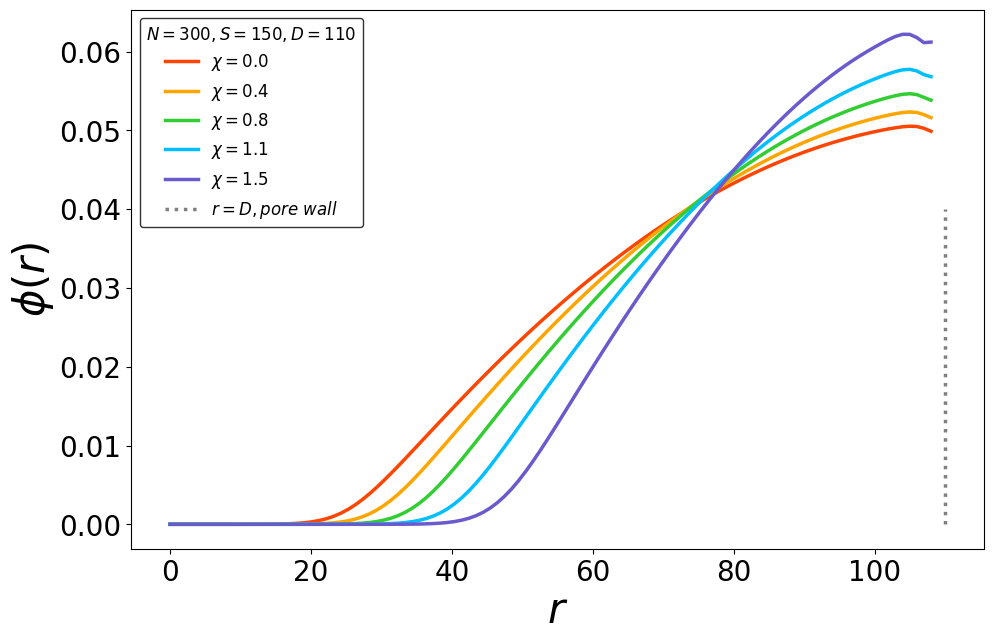

In [97]:
colors = ['orangered', 'orange','limegreen', 'deepskyblue', 'slateblue', 'black', 'fuchsia']

fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

for chi, color, file in zip(chi_range, colors, files_name_pro):
    
    #Получаю профиль потенциала SCF
    phi_namics = np.asarray(pd.read_csv(file, sep='\t')['mol_pol_phi'])[0:D-2]

    r_range = np.linspace(0, D-2, num = D-2)

    #ГРАФИК
    
    axs1.plot(r_range, phi_namics, linestyle = '-',
            linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
    

axs1.plot(np.linspace(D, D, num = 20), np.linspace(0, 0.04, num = 20), linestyle = ':',
linewidth = 2.5,  color = 'gray',label = f'$r = D, pore \\ wall$')

axs1.set_ylabel("$\phi(r)$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)
        

axs1.set_xlabel("$r$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, D = {D}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'upper left')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# fig.savefig('2D_phi_range_Cs.svg', dpi = 400)

### Распределение концов

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2065463/410832746.py:15: SyntaxWarning: invalid escape sequence '\c'
  linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
/tmp/ipykernel_2065463/410832746.py:21: SyntaxWarning: invalid escape sequence '\p'
  axs1.set_ylabel("$\phi(r) ends$",


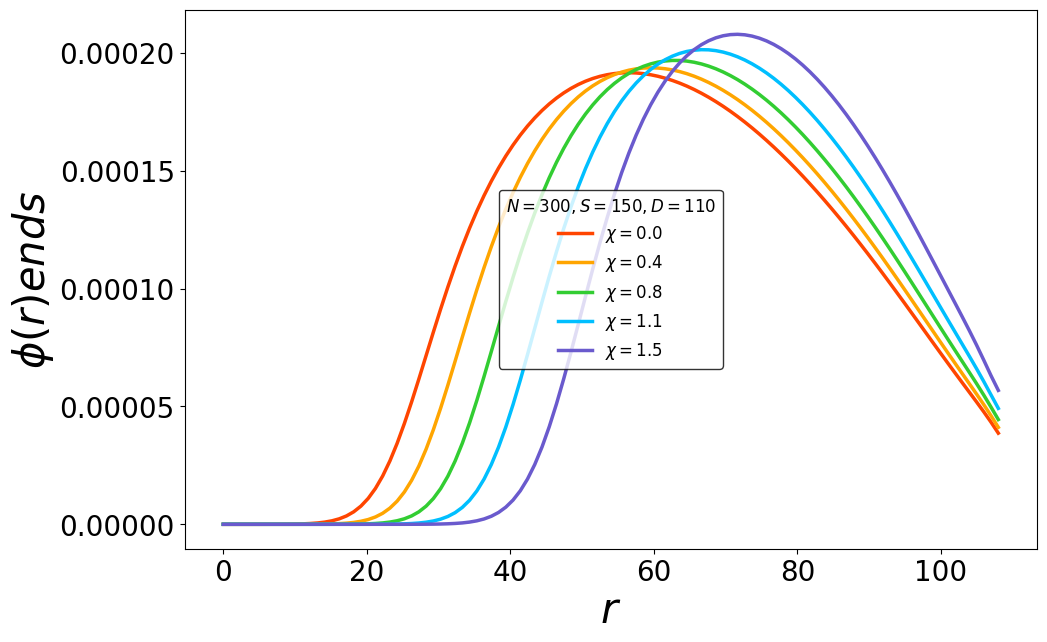

In [98]:
colors = ['orangered', 'orange','limegreen', 'deepskyblue', 'slateblue', 'black', 'fuchsia']

fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

for chi, color, file in zip(chi_range, colors, files_name_pro):
    
    #Получаю профиль потенциала SCF
    phi_namics = np.asarray(pd.read_csv(file, sep='\t')['mon_E_phi'])[0:D-2]

    r_range = np.linspace(0, D-2, num = D-2)

    #ГРАФИК
    
    axs1.plot(r_range, phi_namics, linestyle = '-',
            linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
    

# axs1.plot(np.linspace(D, D, num = 20), np.linspace(0, 0.04, num = 20), linestyle = ':',
# linewidth = 2.5,  color = 'gray',label = f'$r = D, pore \\ wall$')

axs1.set_ylabel("$\phi(r) ends$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)
        

axs1.set_xlabel("$r$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, D = {D}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'center')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# fig.savefig('2D_phi_range_Cs.svg', dpi = 400)

### Электростатический потенциал

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2065463/2879454212.py:24: SyntaxWarning: invalid escape sequence '\c'
  linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
/tmp/ipykernel_2065463/2879454212.py:27: SyntaxWarning: invalid escape sequence '\c'
  linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
/tmp/ipykernel_2065463/2879454212.py:33: SyntaxWarning: invalid escape sequence '\p'
  axs1.set_ylabel("$\psi(r)$",


NameError: name 'r_in_rangeб' is not defined

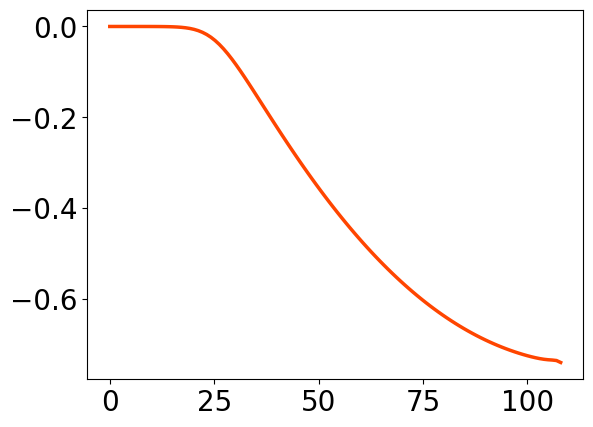

In [99]:
colors = ['orangered', 'orange','limegreen', 'deepskyblue', 'slateblue', 'black', 'fuchsia']

fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

for chi, color, file in zip(chi_range, colors, files_name_pro):
    H, K,  H_0, N, r_in_range, r_out_range, psi_in_range, psi_out_range, c_pol, rho, theta, K, t_lambda_answ = pore_utils(S   = 100,
              alpha  = 0.5,
              Cs  = 0.001,
              a  = 1,
              lb  = 1,
              D  = 300,
              n   = 10,
              g  = 0,
              q  = 1)
    
    #Получаю профиль потенциала SCF
    psi_namics = np.asarray(pd.read_csv(file, sep='\t')['sys_noname_psi'])[0:D-2]

    r_range = np.linspace(0, D-2, num = D-2)

    #ГРАФИК
    
    axs1.plot(r_range, psi_namics, linestyle = '-',
            linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
    
    axs1.plot(np.hstack((r_in_rangeб )), psi_namics, linestyle = '-',
            linewidth = 2.5, color = color, label = f"$\chi = {round(chi, 1)}$")
    

# axs1.plot(np.linspace(D, D, num = 20), np.linspace(0, 0.04, num = 20), linestyle = '',
# linewidth = 2.5,  color = 'gray',label = f'$r = D, pore \\ wall$')

axs1.set_ylabel("$\psi(r)$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)
        

axs1.set_xlabel("$r$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, D = {D}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'upper right')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# fig.savefig('2D_phi_range_Cs.svg', dpi = 400)